### Lesson 7 - Visualization

Part 1 - Familiarity with the work environment and use of operators 
1. Open a new desktop folder named Python_Class   
2. Go to the folder you opened, and create a new notebook called Ex_sol_7   
(Make sure that a notebook has been opened in the desired location)  
3. Add a Markdown cell with the title: General 

### General 

4. Import the Pandas library and matplotlib.pyplot to the notebook   

In [62]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [65]:
# 5. Import the police.csv file into df  : If there is a column with a date, adjust the import so that the column is imported correctly.   
df = pd.read_csv('police.csv', parse_dates=['stop_date'], dayfirst=True)
df

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,ticket_amount,stop_duration,drugs_related_stop
0,2005-01-02,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Ticket,False,341.0,0-15 Min,False
1,2005-01-18,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Ticket,False,161.0,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,NaN,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,NaN,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,NaN,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,NaN,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,0-15 Min,False


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           91741 non-null  datetime64[ns]
 1   stop_time           91741 non-null  object        
 2   county_name         0 non-null      float64       
 3   driver_gender       86406 non-null  object        
 4   driver_age_raw      86414 non-null  float64       
 5   driver_age          86120 non-null  float64       
 6   driver_race         86408 non-null  object        
 7   violation_raw       86408 non-null  object        
 8   violation           86408 non-null  object        
 9   search_conducted    91741 non-null  bool          
 10  search_type         3196 non-null   object        
 11  stop_outcome        86408 non-null  object        
 12  is_arrested         86408 non-null  object        
 13  ticket_amount       1082 non-null   float64   

In [67]:
# 6. Create a new column called stop_year, which will contain only the year the vehicle was stopped by the police.
df['stop_year'] = df['stop_date'].dt.year
#7. Add a column called stop_month which will contain the month the vehicle was stopped by the police.
df['stop_month'] = df['stop_date'].dt.month

In [68]:
#8. Add a column called stop_day_of_week which will contain the day of the week the vehicle was stopped by the police.
df['stop_day_of_week'] = df['stop_date'].dt.day_name()
df['stop_day_of_week'] = df['stop_date'].dt.day_of_week
df.head(3)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,ticket_amount,stop_duration,drugs_related_stop,stop_year,stop_month,stop_day_of_week
0,2005-01-02,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Ticket,False,341.0,0-15 Min,False,2005,1,6
1,2005-01-18,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,0-15 Min,False,2005,1,1
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Ticket,False,161.0,0-15 Min,False,2005,1,6


9. View the first three rows of data from the df, and check that the columns you added have been added correctly   
10. Add a Markdown cell containing the title: matplotlib 

### matplotlib

In [69]:
# 11. Use Group and Aggregate to view the distribution of traffic offenses committed in 2010 for each day of the week 
where2010 = df['stop_year'] == 2010
df[where2010].groupby('stop_day_of_week')['violation_raw'].count()
# !! not 'violation' !! count of raw violations

stop_day_of_week
0    1004
1    1115
2    1077
3     953
4     987
5     981
6     878
Name: violation_raw, dtype: int64

<Axes: title={'center': 'Traffic stop in 2010 by day'}, xlabel='stop_day_of_week'>

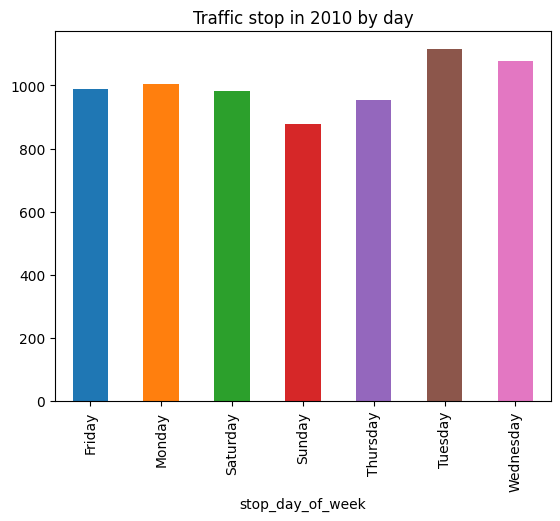

In [70]:
# 12. Continuing from the previous question, change the answer you got from the data into a column chart type. 
# Add a title to the chart, and change the colors of the bars 
df['stop_day_of_week'] = df['stop_date'].dt.day_name()
df[where2010].groupby('stop_day_of_week')['violation_raw'].count().plot.bar(title='Traffic stop in 2010 by day',
                                                                                 color=['C0','C1','C2','C3','C4','C5','C6'])

In [71]:
df['stop_day_of_week'] = df['stop_date'].dt.day_of_week

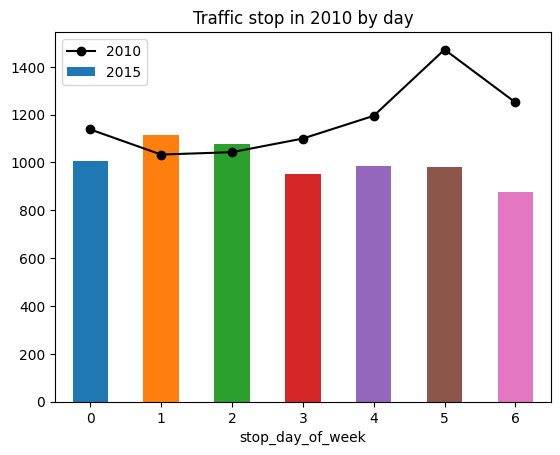

In [72]:
# 13. Continuing from the previous question, copy the code you wrote down into a new cell, and add to the display a new series of the 2015 data. 
where2015 = df['stop_year'] == 2015

df[where2010].groupby('stop_day_of_week')['violation_raw'].count().plot.bar(title='Traffic stop in 2010 by day',
                                                                                 color=['C0','C1','C2','C3','C4','C5','C6'])
df[where2015].groupby('stop_day_of_week')['violation_raw'].count().plot.line(color='black', marker='o')

plt.legend(['2010', '2015'])


14. Based on the chart from the previous question, answer the following questions: 
 a. On which day are there the most vehicle stops by the traffic police?  
 b. Examine and compare the data for 2010 and 2015 - has the situation on the roads improved?   
Express your opinion. Would you need to continue researching the data in order to express a more accurate opinion?   
If so, list the questions you would like to explore (just listquestions, do not olve them)


In [73]:
# 15. We will now look at the Speeding Offense data:
# Create a pivot table that shows for each year the distribution of traffic offenses (rows) classified as Speeding by Gender (columns)

wherespeeding = df['violation_raw'] == 'Speeding'
pivot_speeding =  df[wherespeeding].pivot_table(index='stop_year', 
                              columns='driver_gender', 
                              values='violation_raw', 
                              aggfunc='count')
                                                                   

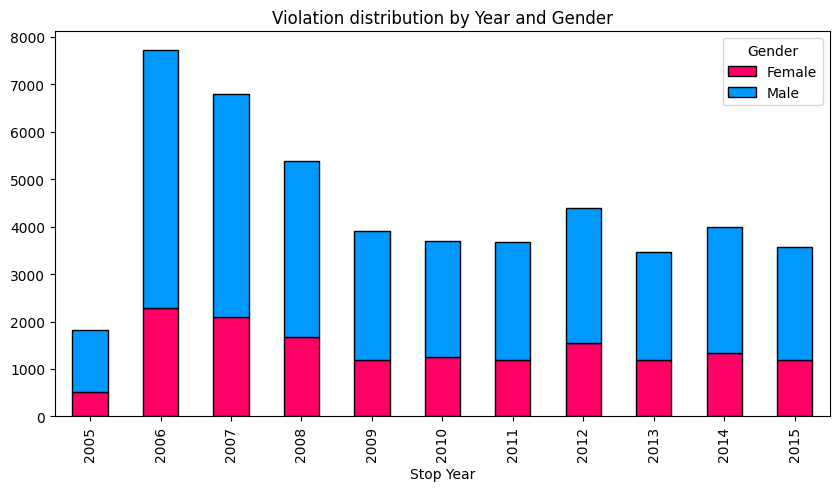

In [74]:
#16. Continuing from the previous question, create a Stacked bar chart which shows the distribution of the speeding offenses over the years by gender. 
# a. Add a title and an appropriate X-axis title 
# b. Change the colors of the chart 
# c. Add a border to the columns 
# d. Expand the chart to size (10,5) 
# e. Change the series titles to Female and Male respectively
# pivot_speeding.plot
pivot_speeding =  df[wherespeeding].pivot_table(index='stop_year', 
                              columns='driver_gender', 
                              values='violation_raw', 
                              aggfunc='count').plot.bar(title="Violation distribution by Year and Gender",
                                                        color=['#ff0066', '#0099ff'],
                                                        xlabel='Stop Year',
                                                        edgecolor='black',
                                                        figsize=(10, 5),
                                                        stacked=True)
plt.legend(title="Gender", labels=['Female','Male'])

<Axes: title={'center': 'Search Conducted Distribution'}>

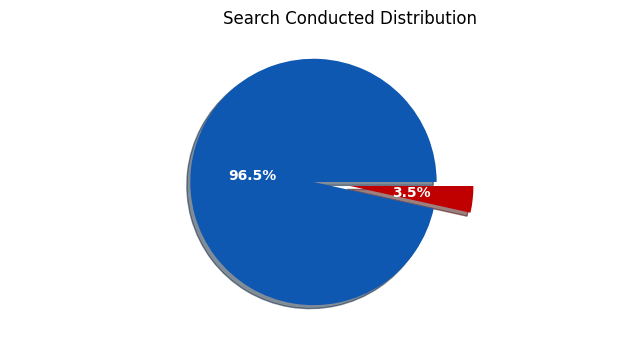

In [75]:
# 17. Create a pie chart that shows the distribution percentage of the number of times a vehicle was searched (search_conducted column) compared to the number of times that a search was not conducted


df['search_conducted'].value_counts().plot.pie(title='Search Conducted Distribution',
                                               colors=["#0e58b2", "#C00000"],
                                               labels=['No Search Conducted','Seach Conducted'],
                                               shadow=True,
                                               autopct='%1.1f%%',
                                               pctdistance=0.5,
                                               explode=[0.3, 0],
                                               figsize=(4, 4),
                                               ylabel='',
                                               textprops={'color':"white",'weight':'bold'},
                                               )


### Seaborn 

Part 2 - Seaborn   
18. Add a Markdown cell containing the title: Seaborn   
19. Import the seaborn library   
20. Copy the following code to the notebook, and run it:   

In [76]:
import seaborn as sns

<Axes: xlabel='driver_age', ylabel='ticket_amount'>

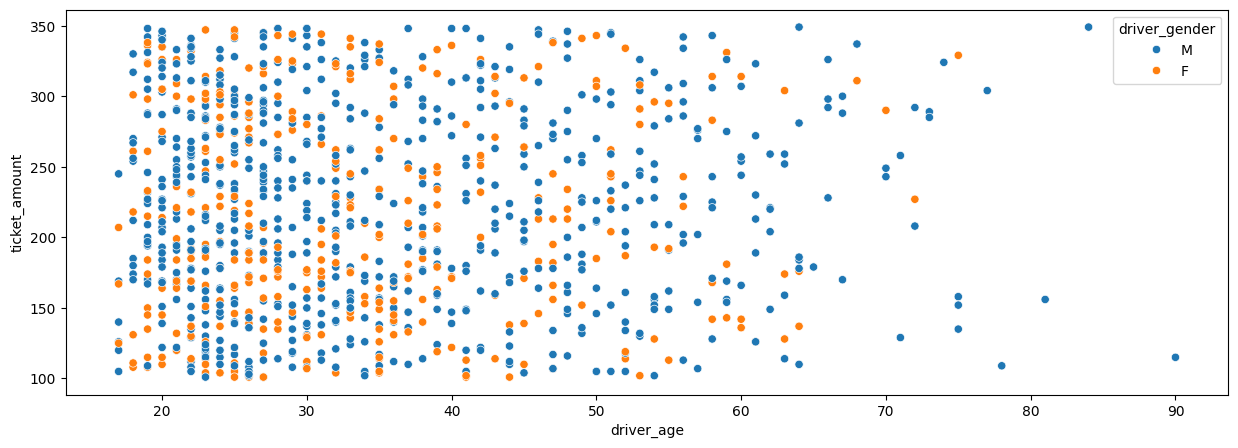

In [77]:
plt.figure(figsize=(15,5)) 
sns.scatterplot(data=df, x='driver_age', y='ticket_amount', hue='driver_gender')

<Axes: xlabel='violation', ylabel='count'>

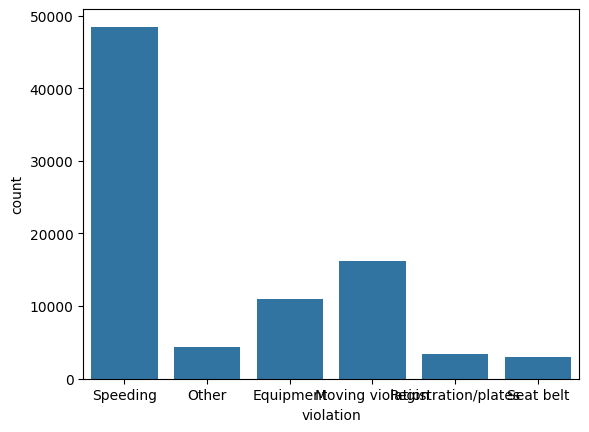

In [78]:
# 21. Use countplot to create a chart showing the distribution of traffic offenses (violation column) by type of traffic offense. 
# Design the chart and add the following elements: 
# a. Enlarge the size of the chart to (12,6) 
sns.countplot(data=df, x='violation')

<Axes: xlabel='violation', ylabel='count'>

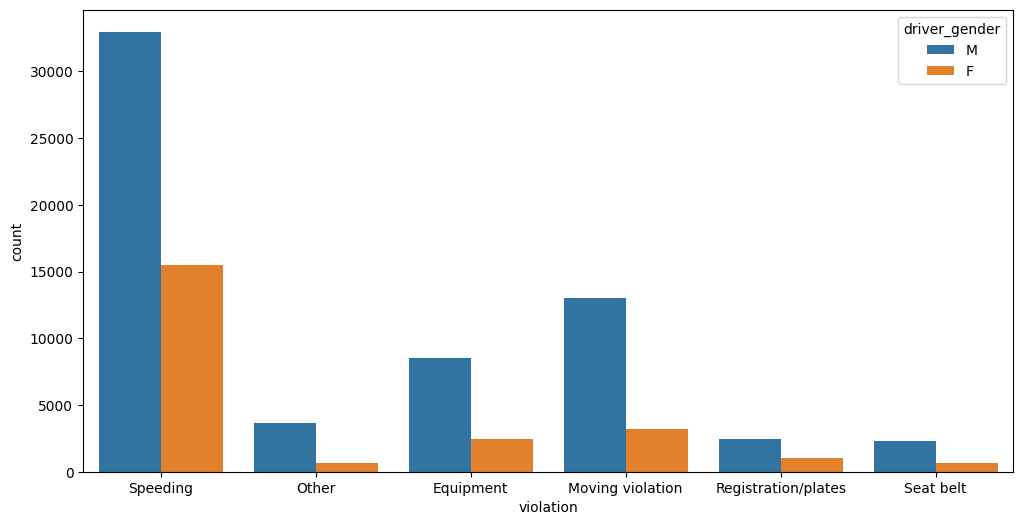

In [ ]:
# b. Add a title to the chart, and set the font size of the title to 20
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='violation', hue='driver_gender')
# c. Save the chart into a variable called splot


[Text(0, 0, '15482'),
 Text(0, 0, '690'),
 Text(0, 0, '2487'),
 Text(0, 0, '3204'),
 Text(0, 0, '1013'),
 Text(0, 0, '635')]

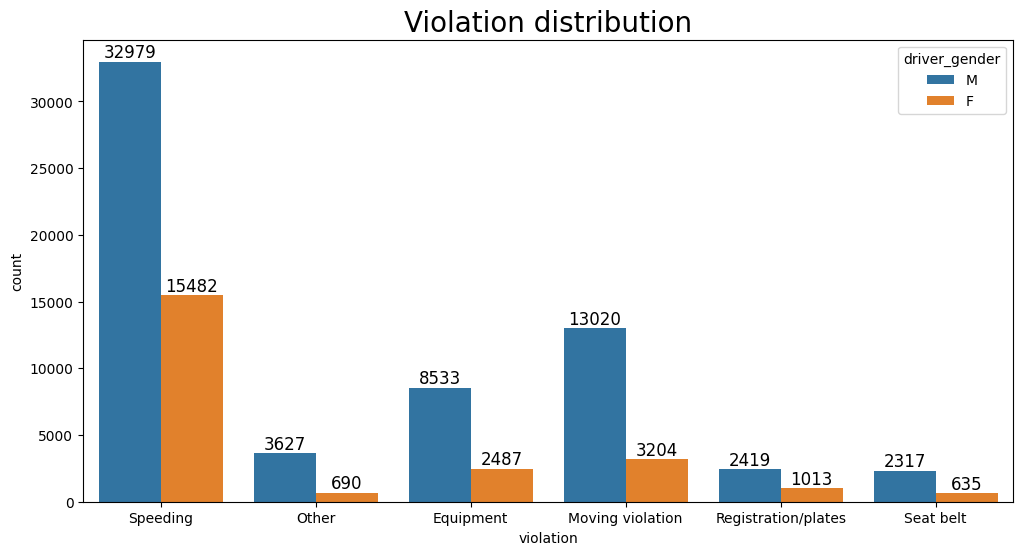

In [102]:

plt.figure(figsize=(12, 6))
splot = sns.countplot(data=df, 
                      x='violation', 
                      hue='driver_gender'
)
plt.title('Violation distribution', fontsize=20)

plt.bar_label(splot.containers[0], size=12)
plt.bar_label(splot.containers[1], size=12)

